In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 8.0})
sns.set_context("poster", font_scale=1.0)

#Load file
df = pd.read_csv('data/sapaTempData696items08dec2013thru26jul2014.csv')
df.drop(df.columns[0],1,inplace=True)
df.head()

#Split demographic data and responses
responses = df.drop(df.columns[0:20],1)
demographs = df.drop(df.columns[20:],1)

In [2]:
X = df.drop(df.columns[0:20],1)
X.replace({1:-3,2:-2,3:-1,4:1,5:2,6:3},inplace=True) #change from 1-6 scale to -3-3 (excluding 0) scale

XScaled = (X-X.mean(axis=0))/X.std(axis=0) #Pandas handles all these operations in a missing aware away.
XScaled.describe().round(4) #Quick Check to see results of scaling

,q_6,q_20,q_22,q_23,q_26,q_31,q_35,q_38,q_39,q_40,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
count,2514.0000,2441.0000,2713.0000,3605.0000,2311.0000,2476.0000,2431.0000,2468.0000,2529.0000,5998.0000,...,2434.0000,2512.0000,2437.0000,2444.0000,2504.0000,2491.0000,2469.0000,2494.0000,2430.0000,2522.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-3.6647,-2.4290,-1.7400,-1.4532,-1.1064,-1.1747,-1.2296,-2.5571,-2.6987,-1.2341,...,-1.2848,-1.7873,-0.7749,-2.2885,-1.9683,-0.7995,-2.6116,-2.6355,-3.2967,-1.2718
25%,-0.6044,-0.0473,-0.6792,-0.9688,-0.5464,-0.6656,-0.6952,-0.1072,-0.1360,-1.2341,...,-0.7186,-0.7269,-0.7749,-0.0876,-0.8893,-0.7995,-0.2364,-0.1439,-0.0046,-0.7856
50%,0.1607,0.5481,0.3816,0.4844,-0.5464,-0.1565,-0.1607,0.5053,0.5046,-0.3138,...,-0.1524,0.3335,-0.1970,0.4627,0.1896,-0.2136,0.3574,0.4790,0.6538,-0.2995
75%,0.9258,0.5481,0.9120,0.9688,1.1335,0.8617,0.9082,0.5053,0.5046,1.0667,...,0.9801,0.8637,0.3808,1.0129,0.7291,0.3723,0.9512,0.4790,0.6538,0.6727
max,0.9258,1.1435,1.4425,1.4532,2.2535,1.8799,1.9771,1.1177,1.1453,1.5268,...,2.1125,1.3939,2.6922,1.0129,1.2685,2.7160,0.9512,1.1020,0.6538,1.6449


Mean of zero and std of 1 across the board.

In [4]:
# Now fill with zeroes - this lets us use ordinary dot product.
XScaled.fillna(0,inplace=True)
XScaled.head()

,q_6,q_20,q_22,q_23,q_26,q_31,q_35,q_38,q_39,q_40,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
0,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,...,-1.284816,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
1,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,...,0.000000,0,0.000000,0.000000,-1.968269,0.000000,0,0.000000,0.000000,0.000000
2,0,0.548093,0,0.000000,0,-0.156473,0.908198,0,0,0.000000,...,0.000000,0,0.000000,0.462658,0.000000,0.000000,0,-0.143864,-0.004606,-1.271753
3,0,0.000000,0,0.000000,0,0.000000,0.000000,0,0,0.606523,...,0.000000,0,0.000000,0.000000,0.000000,0.372347,0,1.101957,0.000000,0.000000
4,0,-0.047321,0,0.484392,0,0.000000,0.000000,0,0,0.000000,...,0.000000,0,-0.774879,0.000000,0.000000,0.000000,0,0.479047,0.653821,0.000000


In [5]:
# Compute the point similarity matrix
XScaled.fillna(0,inplace=True) # does'n affect dot product, but demanded by numpy
K = pd.DataFrame(np.dot(XScaled,XScaled.T)) #  X*X' is the point similarity matrix
K.head()

,0,1,2,3,4,5,6,7,8,9,...,23671,23672,23673,23674,23675,23676,23677,23678,23679,23680
0,55.708727,-1.246831,5.877986,-0.472050,3.198519,-2.666195,0.207269,4.889787,0.950767,0.502552,...,-1.259209,3.283962,-1.126320,3.087426,1.880846,1.292083,2.311267,7.955126,-0.868219,-4.728738
1,-1.246831,20.729468,1.263574,1.958152,1.208751,-0.054481,-0.465812,0.000000,-0.908655,0.127878,...,-0.576315,-0.574117,-0.117746,-0.071767,-0.141995,-0.262295,1.779408,-1.179169,-1.642289,0.000000
2,5.877986,1.263574,204.094899,-11.040203,0.529748,4.508743,-1.976213,-0.651868,8.887891,-4.571305,...,4.521303,1.226088,8.465668,-1.313090,0.402183,-6.482628,-0.042106,12.571872,0.172131,8.700027
3,-0.472050,1.958152,-11.040203,55.116301,-2.347335,-0.714981,2.318283,1.484468,-2.226736,0.790493,...,-2.967225,-2.595084,-2.961153,-0.169721,-2.464595,-4.862016,0.813390,-2.402186,5.332492,2.800916
4,3.198519,1.208751,0.529748,-2.347335,135.249653,-3.787770,-0.951114,0.089734,-1.582501,-2.738065,...,1.534184,2.993237,2.246280,-1.740127,6.889988,-2.874550,0.369845,-8.819770,-5.682655,-4.780504


Looking good, but we need to normalise by the number of questions in common. So let's get that matrix.

In [7]:
# Matrix of Responses
R = (XScaled != 0).astype(float) #0 where there was no response, 1 where there was
Qincommon = pd.DataFrame(np.dot(R,R.T)) # n_user x n_user matrix, each value is number of questions in common between pair of users

,q_6,q_20,q_22,q_23,q_26,q_31,q_35,q_38,q_39,q_40,...,q_4291,q_4292,q_4293,q_4294,q_4295,q_4296,q_4297,q_4298,q_4299,q_4300
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,1,1


In [19]:
Qincommon.head(3)

,0,1,2,3,4,5,6,7,8,9,...,23671,23672,23673,23674,23675,23676,23677,23678,23679,23680
0,36,2,13,4,5,3,1,4,2,3,...,1,3,8,2,5,7,2,7,2,2
1,2,17,9,3,2,2,2,0,3,3,...,2,4,1,1,2,1,2,5,2,0
2,13,9,301,25,41,25,10,14,29,27,...,9,33,32,28,26,37,30,60,40,31


In [16]:
KScaled = K.divide(Qincommon)

## Scaled Point Similarity Matrix

In [17]:
KScaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23671,23672,23673,23674,23675,23676,23677,23678,23679,23680
0,1.547465,-0.623416,0.452153,-0.118013,0.639704,-0.888732,0.207269,1.222447,0.475384,0.167517,...,-1.259209,1.094654,-0.140790,1.543713,0.376169,0.184583,1.155633,1.136447,-0.434109,-2.364369
1,-0.623416,1.219380,0.140397,0.652717,0.604375,-0.027240,-0.232906,NaN,-0.302885,0.042626,...,-0.288157,-0.143529,-0.117746,-0.071767,-0.070998,-0.262295,0.889704,-0.235834,-0.821144,NaN
2,0.452153,0.140397,0.678056,-0.441608,0.012921,0.180350,-0.197621,-0.046562,0.306479,-0.169308,...,0.502367,0.037154,0.264552,-0.046896,0.015469,-0.175206,-0.001404,0.209531,0.004303,0.280646
3,-0.118013,0.652717,-0.441608,0.765504,-0.180564,-0.071498,0.772761,0.296894,-0.278342,0.112928,...,-0.741806,-0.324385,-0.211511,-0.042430,-0.189584,-0.442001,0.116199,-0.141305,0.410192,0.350114
4,0.639704,0.604375,0.012921,-0.180564,1.117766,-0.252518,-0.317038,0.008973,-0.131875,-0.182538,...,0.383546,0.374155,0.449256,-0.248590,0.529999,-0.205325,0.036984,-0.326658,-0.516605,-0.341465


## Visualise Similarties and Differences

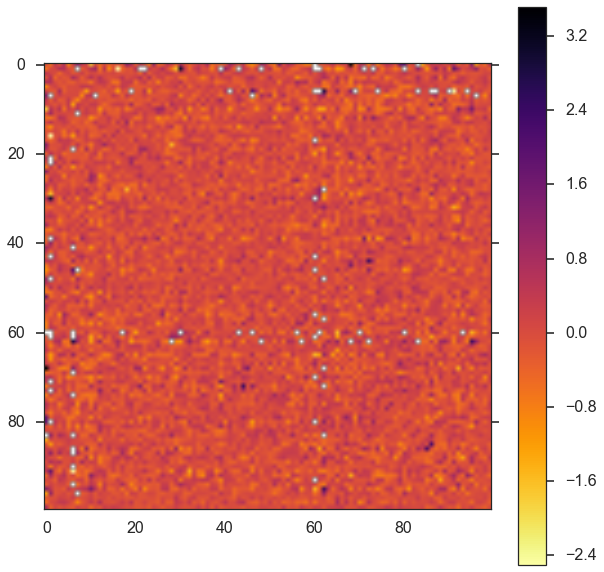

In [18]:
#KPlot = K.values[0:100,0:300]
n = 100 # number of people to compare in plot
KPlot = KScaled.values[0:n,0:n]
np.fill_diagonal(KPlot,0)
fig = plt.figure(figsize=(10,10))  # figure size in inches
plt.imshow(KPlot,cmap=plt.cm.inferno_r)
plt.colorbar()

Shows the covariance between pairs of users, divided by number of questions in common. 